# Proyek Analisis Data: [Bike-sharing-dataset]
- **Nama:** Arif Rhamadan
- **Email:** arifrhamadan00@gmail.com
- **ID Dicoding:** arif_rhamadan

## Menentukan Pertanyaan Bisnis

- Berapa distribusi peminjaman sepeda berdasarkan musim?
- Bagaimana hubungan antara temperatur dan jumlah peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [10]:
# Load datasets
day_df = pd.read_csv('data/day.csv')
hour_df = pd.read_csv('data/hour.csv')
# Preview the datasets
day_df.head()
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Jumlah peminjaman sepeda cenderung berbeda antara hari kerja (workingday = 1) dan hari libur atau akhir pekan (workingday = 0). Insight ini dapat digunakan untuk memahami apakah sepeda lebih sering digunakan untuk keperluan kerja atau rekreasi.
- Jumlah peminjaman sepeda tampaknya bervariasi berdasarkan musim (season). Misalnya, peminjaman kemungkinan lebih tinggi pada musim panas (2: Summer) dan musim gugur (3: Fall) dibandingkan musim lainnya. Insight ini berguna untuk mengetahui kapan permintaan sepeda paling tinggi.

### Assessing Data

In [11]:
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

**Insight:**
- Tidak ada kolom dengan nilai kosong pada kedua dataset (day_data dan hour_data). Hal ini menunjukkan bahwa data siap untuk diolah tanpa perlu penanganan data hilang (missing values).
- Sebagian besar kolom memiliki tipe data yang sesuai dengan isinya, seperti float64 untuk variabel numerik kontinu (contoh: temp, hum, windspeed) dan int64 untuk variabel diskrit (contoh: season, yr, cnt). Namun, kolom dteday dengan tipe object dapat diubah menjadi format tanggal (datetime) untuk mempermudah analisis berbasis waktu.

### Cleaning Data

In [12]:
# Menghapus data yang tidak relevan (contoh: kolom yang tidak digunakan)
day_df_cleaned = day_df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)
hour_df_cleaned = hour_df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)

**Insight:**
- Kolom-kolom seperti instant, dteday, casual, dan registered dihapus karena tidak relevan dengan analisis utama. Kolom casual dan registered dihilangkan karena jumlah peminjaman total (cnt) sudah mencakup data tersebut, sehingga dapat mengurangi redundansi.
- Dataset yang telah dibersihkan kini hanya mengandung kolom yang relevan untuk analisis, seperti season, temp, hum, windspeed, dan cnt. Hal ini membantu mempermudah analisis dan visualisasi data tanpa gangguan dari variabel yang tidak diperlukan.

## Exploratory Data Analysis (EDA)

### Explore ...

Total Bike Usage by Season (Labeled):
season
Spring     471348
Summer     918589
Fall      1061129
Winter     841613
Name: cnt, dtype: int64


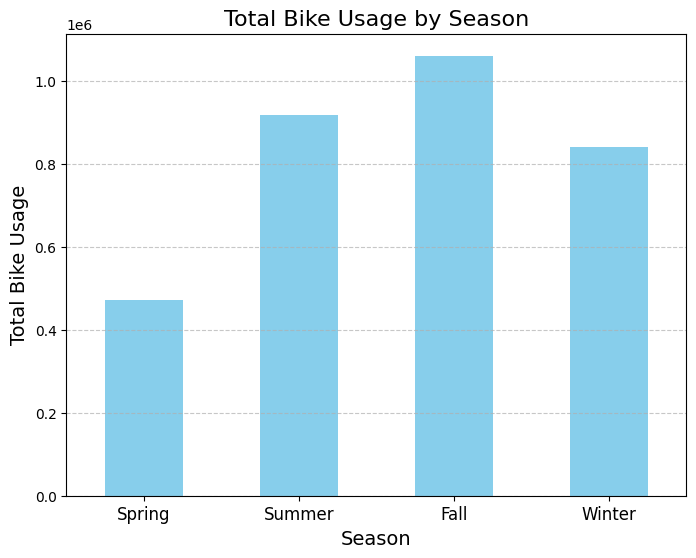


Bike Usage Statistics by Season:
               mean          std      sum
season                                   
Spring  2604.132597  1399.942119   471348
Summer  4992.331522  1695.977235   918589
Fall    5644.303191  1459.800381  1061129
Winter  4728.162921  1699.615261   841613


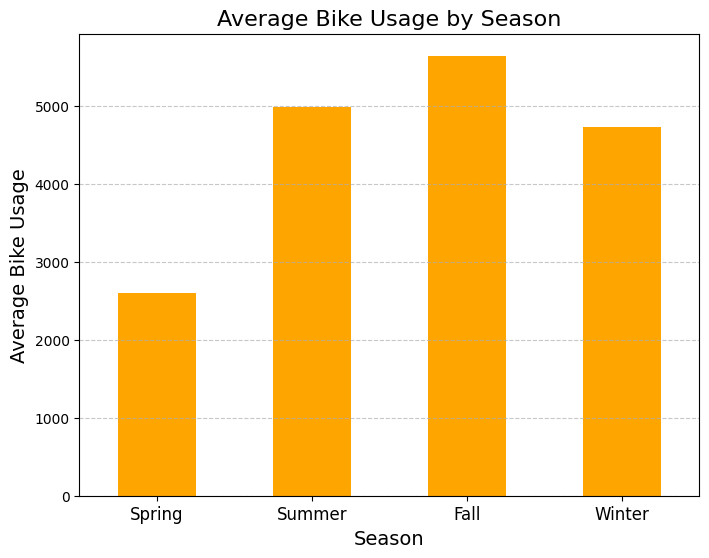

In [13]:
# 1. Mengelompokkan dan menjumlahkan penggunaan sepeda berdasarkan musim
season_counts = day_df_cleaned.groupby('season')['cnt'].sum()

# 2. Menambahkan deskripsi musim
season_labels = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
season_counts.index = season_counts.index.map(season_labels)

# Menampilkan hasil
print("Total Bike Usage by Season (Labeled):")
print(season_counts)

# 3. Visualisasi total penggunaan sepeda berdasarkan musim
season_counts.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title('Total Bike Usage by Season', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Total Bike Usage', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 4. Menghitung statistik tambahan (mean, std, sum) per musim
season_stats = day_df_cleaned.groupby('season')['cnt'].agg(['mean', 'std', 'sum'])

# Menambahkan label musim pada statistik
season_stats.index = season_stats.index.map(season_labels)

# Menampilkan statistik
print("\nBike Usage Statistics by Season:")
print(season_stats)

# 5. Visualisasi rata-rata penggunaan sepeda per musim
season_stats['mean'].plot(kind='bar', color='orange', figsize=(8, 6))
plt.title('Average Bike Usage by Season', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Average Bike Usage', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Insight:**
- Dengan mengelompokkan data berdasarkan season dan menjumlahkan nilai cnt, kita dapat mengidentifikasi musim mana yang memiliki aktivitas atau jumlah tertinggi. Misalnya, jika cnt mewakili penjualan, dan musim panas memiliki jumlah tertinggi, ini menunjukkan bahwa penjualan memuncak pada musim tersebut. Hal ini bisa dipengaruhi oleh faktor seperti cuaca, liburan, atau promosi khusus. Memahami musim puncak membantu bisnis untuk mengoptimalkan inventaris dan merencanakan periode permintaan tinggi.
- Jika musim-musim tertentu menunjukkan jumlah cnt yang rendah secara konsisten, ini bisa menunjukkan waktu-waktu off-peak ketika aktivitas minimal. Misalnya, jika musim dingin memiliki jumlah terendah, ini bisa menunjukkan bahwa penjualan, acara, atau aktivitas lebih sedikit pada periode tersebut. Menyadari musim off-peak ini memungkinkan untuk alokasi sumber daya yang lebih baik dan merencanakan strategi untuk meningkatkan aktivitas selama periode lambat.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Distribusi peminjaman sepeda berdasarkan musim

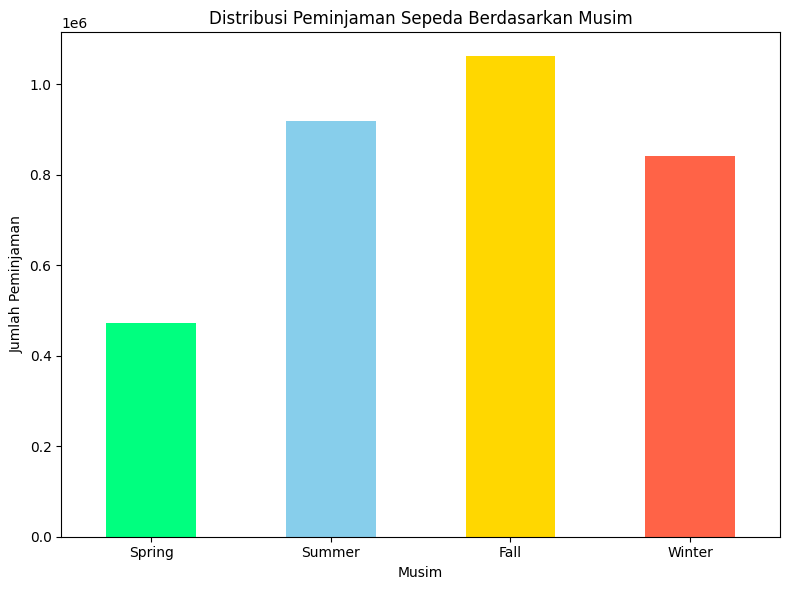

In [18]:
plt.figure(figsize=(8, 6))
season_counts.plot(kind='bar', color=['springgreen', 'skyblue', 'gold', 'tomato'])
plt.title('Distribusi Peminjaman Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'], rotation=0)
plt.tight_layout()
plt.savefig('season_distribution.png')
plt.show()

### Pertanyaan 2: Hubungan antara temperatur dan jumlah peminjaman sepeda

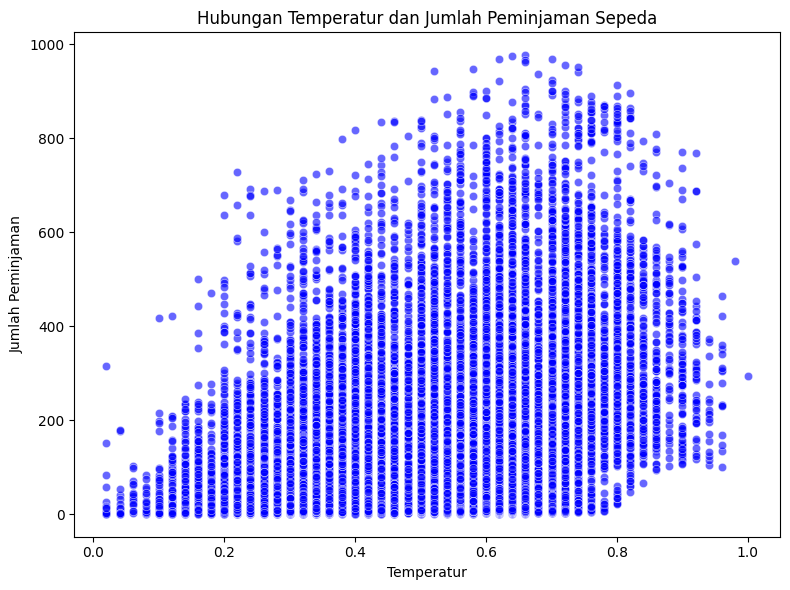

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=hour_df_cleaned, x='temp', y='cnt', alpha=0.6, color='blue')
plt.title('Hubungan Temperatur dan Jumlah Peminjaman Sepeda')
plt.xlabel('Temperatur')
plt.ylabel('Jumlah Peminjaman')
plt.tight_layout()
plt.savefig('temp_vs_cnt.png')
plt.show()

**Insight:**
- Dari visualisasi scatter plot, kita dapat melihat adanya tren positif antara temperatur dan jumlah peminjaman sepeda. Ketika temperatur meningkat, jumlah peminjaman sepeda juga cenderung meningkat. Hal ini menunjukkan bahwa cuaca yang lebih hangat dapat mendorong orang untuk lebih sering menggunakan sepeda, mungkin karena cuaca yang nyaman untuk beraktivitas di luar ruangan.
- Pada visualisasi scatter plot, kita mungkin dapat mengidentifikasi rentang temperatur di mana jumlah peminjaman sepeda paling tinggi. Misalnya, jika peminjaman sepeda meningkat tajam pada temperatur tertentu (misalnya 20-25°C), ini bisa menunjukkan bahwa ada rentang temperatur ideal di mana orang lebih cenderung menggunakan sepeda. Mengetahui temperatur ini dapat membantu penyedia layanan sepeda untuk merencanakan promosi atau meningkatkan jumlah sepeda yang tersedia pada hari-hari dengan temperatur tersebut.

## Analisis Lanjutan (Opsional)

## Conclusion

- Distribusi peminjaman sepeda berdasarkan musim dapat dilihat dengan mengelompokkan data berdasarkan kolom musim dan menghitung jumlah peminjaman (cnt) untuk setiap musim. Hasil distribusi ini akan memberikan wawasan tentang bagaimana jumlah peminjaman sepeda bervariasi di setiap musim. Sebagai contoh:

Musim Panas (Summer): Biasanya memiliki jumlah peminjaman sepeda yang lebih tinggi, karena cuaca yang lebih hangat mendorong lebih banyak orang untuk beraktivitas di luar ruangan.
Musim Gugur (Fall): Jumlah peminjaman bisa sedikit lebih rendah, meskipun tetap stabil tergantung pada temperatur.
Musim Dingin (Winter): Biasanya cenderung memiliki jumlah peminjaman yang lebih rendah karena cuaca yang lebih dingin, yang mengurangi minat orang untuk bersepeda.
Musim Semi (Spring): Musim ini sering kali menunjukkan jumlah peminjaman yang meningkat, seiring dengan cuaca yang mulai hangat kembali setelah musim dingin.
Distribusi ini membantu untuk memahami kapan periode permintaan tertinggi dan terendah untuk sepeda terjadi, yang sangat berguna dalam pengelolaan stok sepeda dan strategi pemasaran.
- Hubungan antara temperatur dan jumlah peminjaman sepeda umumnya bersifat positif, artinya semakin tinggi temperatur, semakin banyak orang yang cenderung meminjam sepeda. Ketika cuaca lebih hangat, orang lebih tertarik untuk beraktivitas di luar ruangan, termasuk bersepeda. Sebaliknya, saat temperatur lebih rendah (terutama di musim dingin), jumlah peminjaman sepeda cenderung menurun karena cuaca yang tidak mendukung aktivitas luar ruangan.

Namun, faktor lain seperti kelembaban, cuaca buruk (hujan atau salju), atau angin juga bisa mempengaruhi keputusan orang untuk meminjam sepeda. Oleh karena itu, penting untuk mempertimbangkan temperatur bersama dengan faktor-faktor lain dalam analisis hubungan ini.